## 获取数据集


In [2]:
# 导包
%matplotlib inline
import d2lzh as d2l
from mxnet.gluon import data as gdata
import sys
import time

In [3]:
# 获取数据集 ,train参数用来控制获取的是测试集还是训练集
# 这里用终端才成功下载，不知道为啥
mnist_train = gdata.vision.FashionMNIST(train=True)
mnist_test = gdata.vision.FashionMNIST(train=False)

In [4]:
len(mnist_train),len(mnist_test)

(60000, 10000)

In [5]:
# 获取第一个样本的特征和标签
feature, label = mnist_train[0]

In [6]:
# feature是高和宽均为28像素的图像
feature.shape, feature.dtype

((28, 28, 1), numpy.uint8)

In [7]:
feature


[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  4]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 62]
  [ 61]
  [ 21]
  [ 29]
  [ 23]
  [ 51]
  [136]
  [ 61]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 88]
  [201]
  [228]
  [225]
  [255]

In [8]:
# 图像的标签用Numpy的标量来表示，类型是32位整数(int32)
label, type(label), label.dtype

(2, numpy.int32, dtype('int32'))

In [9]:
# 将数值标签转换成文本标签
def get_fashion_mnist_labels(labels):
    text_labels = [
                    't-shirt', 'trouser', 'pullover',
                    'dress', 'coat', 'sandal', 'shirt',
                    'sneaker', 'bag','ankle boot'
                  ]
    return [text_labels[int(i)] for i in labels]

In [10]:
# 定义一个可以在一行里画出多张图像和对应标签的函数
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    _, figs = d2l.plt.subplots(1, len(images), figsize =(12, 12))
    
    # 将空的子图，像素值，对应的图像预测结果 组合在一起
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

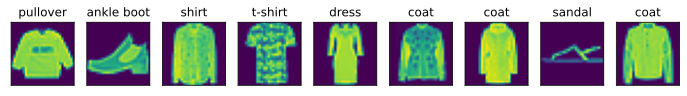

In [11]:
# 选择前9个样本，X是特征，y是标签
X, y = mnist_train[0:9]

# 
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [12]:
names = ['ming','li','hua']
genders = ['female', 'male', 'male']
favs = ['apple', 'banana', 'orange']
for name, gender, fav in zip(names,genders, favs):
    print(name)
    print(gender)
    print(fav)

ming
female
apple
li
male
banana
hua
male
orange


In [25]:
# 使用Gluon的DataLoader来多进程获取数据

# 定义小批量为一次读取256个图像
batch_size = 255

# ToTensor()将图像数据从uint8变成32位浮点格式，并处以255,让每个像素值都在0到1之间
# ToTensor()还将图像通道最后一维(28,28,1)的1移到最前一维(1,28,28)，方便之后的卷积神经网络
transformer = gdata.vision.transforms.ToTensor()

# 判断os 来考虑是否使用多进程读取数据，因为windows不能多进程读取
if sys.platform.startswith('win'):
    num_workers = 0
else:
    num_workers = 2

train_iter = gdata.DataLoader(
                                mnist_train.transform_first(transformer),
                                batch_size, shuffle=True,
                                num_workers=num_workers
                             )

test_iter = gdata.DataLoader(
                                mnist_test.transform_first(transformer),
                                batch_size, shuffle=True,
                                num_workers=num_workers
                             )


In [26]:
start = time.time()
for X, y in train_iter:
    continue
'{} sec'.format(time.time() - start)

'3.5831494331359863 sec'

## 练习
- 减小batch_size()会影响读取性能吗？
    会，batch_size()越小，读取性能越差
- 非Windows用戶请尝试修改num_workers来查看它对读取性能的影响
    1和2的时候有区别，在往上加就没什么区别了，应该是性能问题